# Pre prosseing dataset





In [1]:
from keras.layers import SimpleRNN, Embedding, Dense,Dropout, LSTM
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [3]:
data.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"Category", "v2":"Message"})

In [5]:
data["Message"] = data["Message"].str.lower()

In [6]:
data['Category'] = data['Category'].map(
                   {'ham':0 ,'spam':1})

labels=np.asarray(data['Category'])
texts=np.asarray(data['Message'])


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [7]:
data

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [8]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 10000 #the size of the random subsets of features to consider when splitting a node.
maxlen = 500 #the length of all tokenized sms post-padding is set using ‘max_len’

training_samples = int(5572 * .8)#80 data set for training
validation_samples = int(5572 - training_samples)#20 pecent for validation

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

# shuffling data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:]
y_test = labels[training_samples:]

Found 8920 unique words: 
data shape:  (5572, 500)


**RNN MODEL**

In [9]:
model = Sequential()#input layer
model.add(Embedding(max_features, 32))#The embedding layer
model.add(SimpleRNN(32))#RNN LAYER
model.add(Dropout(0.2))# drop out layer
model.add(Dense(1, activation='softmax'))#outer layer

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model.fit(x_train, y_train, epochs=10, batch_size=60,validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 29s 126ms/step - loss: 0.3851 - accuracy: 0.1306 - val_loss: 0.1468 - val_accuracy: 0.1345
Epoch 2/10
60/60 [==============================] - 7s 113ms/step - loss: 0.1333 - accuracy: 0.1341 - val_loss: 0.0688 - val_accuracy: 0.1345
Epoch 3/10
60/60 [==============================] - 7s 115ms/step - loss: 0.0682 - accuracy: 0.1435 - val_loss: 0.0469 - val_accuracy: 0.1345
Epoch 4/10
60/60 [==============================] - 7s 113ms/step - loss: 0.2777 - accuracy: 0.1304 - val_loss: 0.1490 - val_accuracy: 0.1345
Epoch 5/10
60/60 [==============================] - 7s 114ms/step - loss: 0.1686 - accuracy: 0.1390 - val_loss: 0.2206 - val_accuracy: 0.1345
Epoch 6/10
60/60 [==============================] - 7s 115ms/step - loss: 0.1065 - accuracy: 0.1367 - val_loss: 0.0679 - val_accuracy: 0.1345
Epoch 7/10
60/60 [==============================] - 7s 116ms/step - loss: 0.0384 - accuracy: 0.1324 - val_loss: 0.0505 - val_accuracy: 0.1345
Epoch

In [10]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

12/12 - 0s - loss: 0.0472 - accuracy: 0.1327
score: 0.05
accuracy: 0.13


In [11]:
y_pred=model.predict(x_test)

In [12]:

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('f1 score: ', format(f1_score(y_test,y_pred)))
print('presision score: ', format( precision_score(y_test,y_pred)))
print('recall score: ', format(recall_score(y_test,y_pred)))

f1 score:  0.2343626286619161
presision score:  0.13273542600896862
recall score:  1.0


# Tuned RNN model

In [13]:

model = Sequential()#input layer
model.add(Embedding(max_features, 32))#The embedding layer
model.add(SimpleRNN(32))#RNN LAYER
model.add(Dropout(0.2))# drop out layer
model.add(Dense(1, activation='sigmoid'))#outer layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model.fit(x_train, y_train, epochs=6, batch_size=60,validation_split=0.2)

Epoch 1/6
60/60 [==============================] - 9s 128ms/step - loss: 0.4805 - accuracy: 0.8586 - val_loss: 0.3219 - val_accuracy: 0.8655
Epoch 2/6
60/60 [==============================] - 7s 118ms/step - loss: 0.2161 - accuracy: 0.9305 - val_loss: 0.0698 - val_accuracy: 0.9899
Epoch 3/6
60/60 [==============================] - 7s 118ms/step - loss: 0.0669 - accuracy: 0.9876 - val_loss: 0.0442 - val_accuracy: 0.9910
Epoch 4/6
60/60 [==============================] - 7s 118ms/step - loss: 0.0281 - accuracy: 0.9971 - val_loss: 0.0393 - val_accuracy: 0.9899
Epoch 5/6
60/60 [==============================] - 7s 117ms/step - loss: 0.0194 - accuracy: 0.9973 - val_loss: 0.0348 - val_accuracy: 0.9922
Epoch 6/6
60/60 [==============================] - 7s 118ms/step - loss: 0.0100 - accuracy: 0.9992 - val_loss: 0.0406 - val_accuracy: 0.9877


In [14]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

12/12 - 0s - loss: 0.0392 - accuracy: 0.9892
score: 0.04
acc: 0.99


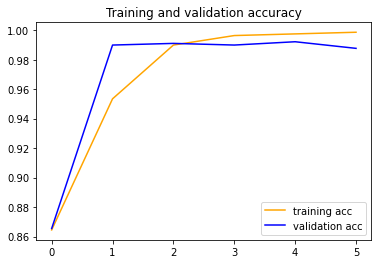

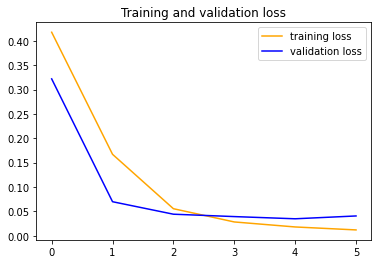

In [15]:
acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# LTSM model

In [16]:
model = Sequential()#input layer
model.add(Embedding(max_features, 32))#The embedding layer
model.add(LSTM(32))#LSTM LAYER
model.add(Dense(1, activation='softmax'))#outer layer
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_ltsm = model.fit(x_train, y_train, epochs=10, batch_size=60, validation_split=0.2)



Epoch 1/10
60/60 [==============================] - 19s 250ms/step - loss: 0.4363 - accuracy: 0.1325 - val_loss: 0.1404 - val_accuracy: 0.1345
Epoch 2/10
60/60 [==============================] - 14s 240ms/step - loss: 0.1379 - accuracy: 0.1360 - val_loss: 0.0637 - val_accuracy: 0.1345
Epoch 3/10
60/60 [==============================] - 14s 240ms/step - loss: 0.0646 - accuracy: 0.1392 - val_loss: 0.0394 - val_accuracy: 0.1345
Epoch 4/10
60/60 [==============================] - 14s 240ms/step - loss: 0.0409 - accuracy: 0.1302 - val_loss: 0.0333 - val_accuracy: 0.1345
Epoch 5/10
60/60 [==============================] - 14s 238ms/step - loss: 0.0269 - accuracy: 0.1389 - val_loss: 0.0303 - val_accuracy: 0.1345
Epoch 6/10
60/60 [==============================] - 15s 243ms/step - loss: 0.0223 - accuracy: 0.1444 - val_loss: 0.0364 - val_accuracy: 0.1345
Epoch 7/10
60/60 [==============================] - 14s 238ms/step - loss: 0.0111 - accuracy: 0.1419 - val_loss: 0.0431 - val_accuracy: 0.1345

In [17]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

12/12 - 1s - loss: 0.0353 - accuracy: 0.1327
score: 0.04
acc: 0.13


# TUNED LSTM

In [18]:
#@title Default title text
model = Sequential()#input layer
model.add(Embedding(max_features, 32))#The embedding layer
model.add(LSTM(32))#LSTM LAYER
model.add(Dropout(0.2))# drop out layer
model.add(Dense(1, activation='sigmoid'))#outer layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_ltsm = model.fit(x_train, y_train, epochs=6, batch_size=60,validation_split=0.2)

Epoch 1/6
60/60 [==============================] - 17s 252ms/step - loss: 0.5303 - accuracy: 0.8333 - val_loss: 0.2017 - val_accuracy: 0.9406
Epoch 2/6
60/60 [==============================] - 15s 242ms/step - loss: 0.1557 - accuracy: 0.9605 - val_loss: 0.0627 - val_accuracy: 0.9865
Epoch 3/6
60/60 [==============================] - 14s 241ms/step - loss: 0.0614 - accuracy: 0.9860 - val_loss: 0.0559 - val_accuracy: 0.9888
Epoch 4/6
60/60 [==============================] - 15s 243ms/step - loss: 0.0308 - accuracy: 0.9948 - val_loss: 0.0298 - val_accuracy: 0.9933
Epoch 5/6
60/60 [==============================] - 14s 242ms/step - loss: 0.0178 - accuracy: 0.9968 - val_loss: 0.0379 - val_accuracy: 0.9899
Epoch 6/6
60/60 [==============================] - 14s 241ms/step - loss: 0.0130 - accuracy: 0.9991 - val_loss: 0.0292 - val_accuracy: 0.9933


In [19]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

12/12 - 1s - loss: 0.0283 - accuracy: 0.9928
score: 0.03
acc: 0.99


In [20]:
y_pred=model.predict(x_test)

In [21]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
import keras
import re
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
load_model=keras.models.load_model("/content/model.h5")


In [23]:
#@title Interface { run: "auto", vertical-output: true }


test = 'Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed \xC3\xA5\xC2\xA31000 cash or \xC3\xA5\xC2\xA35000 prize!' #@param {type: "string"}

test=[(test)]
seq = tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=1000)
pred = load_model.predict(padded)
print("pred", pred)
if pred <0.5:
  
  print("ham")
    
else:
  
    print("spam")

pred [[0.98942924]]
spam


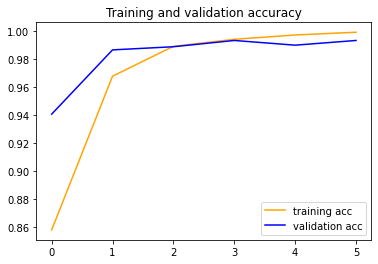

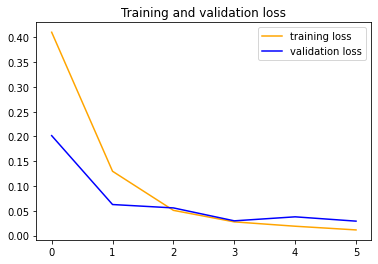

In [25]:
acc = history_ltsm.history['accuracy']
val_acc = history_ltsm.history['val_accuracy']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Essemble model


**RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
model=RandomForestClassifier(random_state=100, n_estimators=500,max_features=32 )

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('f1 score: ', format(f1_score(y_test,y_pred)))
print('presision score: ', format( precision_score(y_test,y_pred)))
print('recall score: ', format(recall_score(y_test,y_pred)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_pred)

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);



**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,shuffle=False)

In [ ]:
model=DecisionTreeClassifier(max_features=32)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('f1 score: ', format(f1_score(y_test,y_pred)))
print('presision score: ', format( precision_score(y_test,y_pred)))
print('recall score: ', format(recall_score(y_test,y_pred)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_pred)

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

-

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,shuffle=False)

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('f1 score: ', format(f1_score(y_test,y_pred)))
print('presision score: ', format( precision_score(y_test,y_pred)))
print('recall score: ', format(recall_score(y_test,y_pred)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_pred)

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);